In [1]:
import random

In [2]:
def flip_coin():
    if random.random() > 0.5:
        return True
    else:
        return False

In [68]:
print([flip_coin() for i in range(10)]) # Test it out

[False, True, False, True, True, False, True, True, False, True]


In [19]:
def sim_flip(n=16):
    record = [0 for j in range(n)]
    for j in range(n):
        for i in range(2**j):
            if flip_coin():
                record[j] += 1
    return record

In [21]:
print(sim_flip()) # test it out

[1, 1, 1, 5, 5, 15, 34, 72, 129, 263, 509, 1019, 2053, 4096, 8147, 16362]


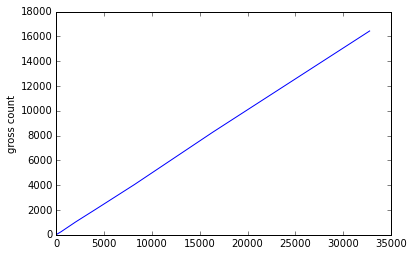

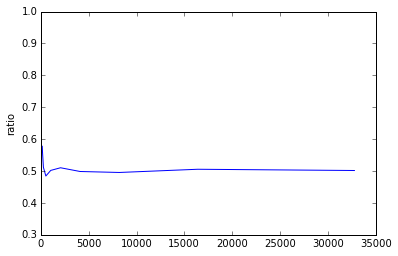

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

heads = sim_flip()
n = len(heads)
flips = [2**j for j in range(n)]
heads_ratio = [heads[j]/flips[j] for j in range(n)]

plt.plot(flips, heads, label="gross counts")
plt.ylabel("gross count")
plt.show()
plt.plot(flips, heads_ratio, label="heads-tails ratio")
plt.ylabel("ratio")
plt.show()

Notes:
The first graph shows a linear relationship between the number of flips and the number of heads that those flips yielded. Some small deviation from a perfectly straight line might be noticable in the left-most part of the graph due to deviations from the expected yield of heads. It becomes increasingly linear as it gets to high counts.
The second graph is mostly constant because the fraction of flips that yield heads is mostly constant at 50% under all cirumstances. However, with few flips, there is more random deviation from the expected value.

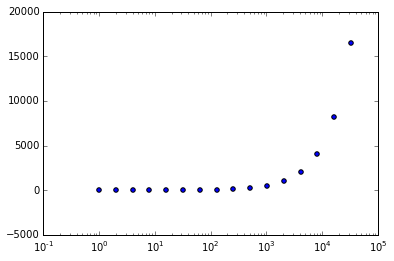

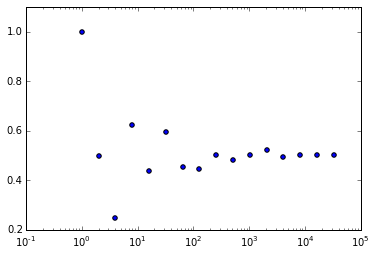

In [44]:
plt.scatter(flips, heads, label="gross counts")
plt.ylabel("gross count")
plt.xscale("log")
plt.show()
plt.scatter(flips, heads_ratio, label="heads-tails ratio")
plt.ylabel("ratio")
plt.xscale("log")
plt.show()

Notes:
Changing the x-axis to log scale means that only the last few trials will appear to have a substantial number of heads out of their flips. The smaller number trials are all indistinguishable from zero.
The second graph shows the severity of the deviation from the expected fraction of heads, with the trials have relatively equal x-axis spacing in spite of using vastly different numbers of trials. This shows a satisfying approach to a small band around the expected yield.

In [48]:
import statistics as st

trial_set = [[] for j in range(16)]
for k in range(20):
    heads = sim_flip()
    for j in range(16):
        trial_set[j].append(heads[j])
trial_means = []
trial_stds = []
for j in range(16):
    trials = trial_set[j]
    trial_means.append(sum(trials)/len(trials))
    trial_stds.append(st.stdev(trials))
print(trial_means)
print(trial_stds)

[0.45, 0.9, 1.9, 3.95, 8.15, 16.4, 33.25, 63.6, 124.3, 256.1, 513.85, 1023.55, 2041.2, 4096.25, 8178.7, 16361.7]
[0.5104177855340405, 0.7181848464596079, 0.7181848464596079, 1.5719582155957414, 1.5652475842498528, 2.9982451007565287, 3.8780760286784637, 7.228598175230614, 9.245767168078363, 12.891857895586655, 16.384443841644426, 19.805568063445932, 33.538038106007335, 42.66253749208031, 57.39255407418191, 77.52154199759065]


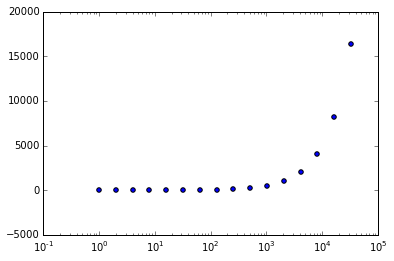

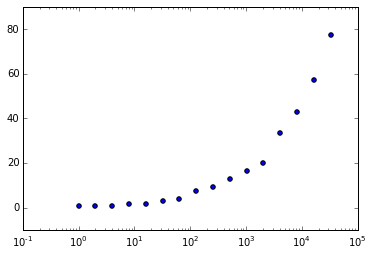

In [49]:
plt.scatter(flips, trial_means, label="gross counts")
plt.xscale("log")
plt.show()
plt.scatter(flips, trial_stds, label="heads-tails ratio")
plt.xscale("log")
plt.show()

Notes:
The first graph is mostly the same as the last case, except with 20 times as many flips.
The first graph shows a slower climb in the standard deviation of the flips. The standard deviation still grows with more trials - but not as fast as the gross count does. This means that the fraction of flips yielding heads is more predictable with more trials.

In [59]:
trial_1h = [0 for i in range(100000)]
trial_1k = [0 for i in range(100000)]
for k in range(100000):
    trial_1h[k] = sum(flip_coin() for i in range(100))/100
    trial_1k[k] = sum(flip_coin() for i in range(1000))/1000
print(str(trial_1h[0])+" "+str(trial_1k[0]))

0.51 0.498


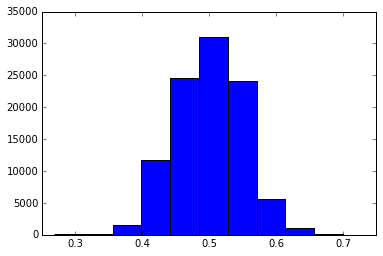

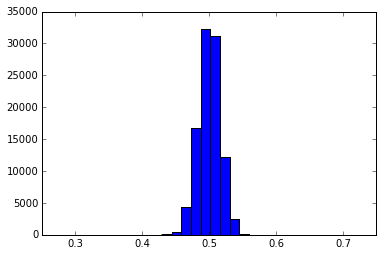

In [73]:
plt.hist(trial_1h)
plt.axis((.25,.75,0,35000))
plt.show()
plt.hist(trial_1k)
plt.axis((.25,.75,0,35000))
plt.show()

Notes:
In these two graphs, I made the window the same size. This helps to illustrate the smaller width of the peak for the case with 1,000 flips in each trial. There is much tighter grouping of the measured rate of heads with an increased number of trials.

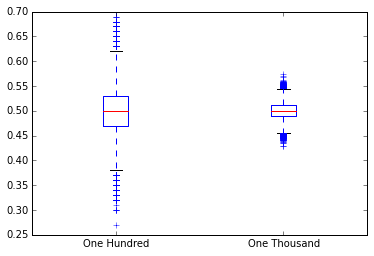

In [66]:
plt.boxplot([trial_1h, trial_1k])
plt.xticks([1,2], ['One Hundred','One Thousand'])
plt.show()

Notes:
This is another way of telling the same story as the last set of graphs. Instead of presenting a histogram, here we have marks that show the distribution of certain percentiles. Again, the larger number of trials demonstrates tighter grouping of measured heads rate.